<a href="https://colab.research.google.com/github/DanialQureshi26/ML-Projects/blob/main/PAN_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the important libraries
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Now making directories/folders in Collab
!mkdir pan_card_tempring
!mkdir pan_card_tempring/image

mkdir: cannot create directory ‘pan_card_tempring’: File exists


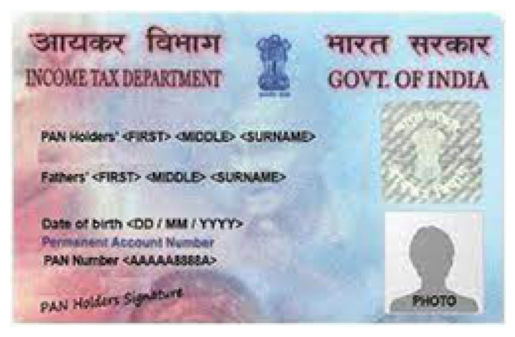

In [ ]:
import matplotlib.pyplot as plt

# Open the original image
original = Image.open('/content/pan_card_tempring/static/images/original.jpg')

# Display the image using matplotlib
plt.imshow(original)
plt.axis('off')  # Hide the axis
plt.show()


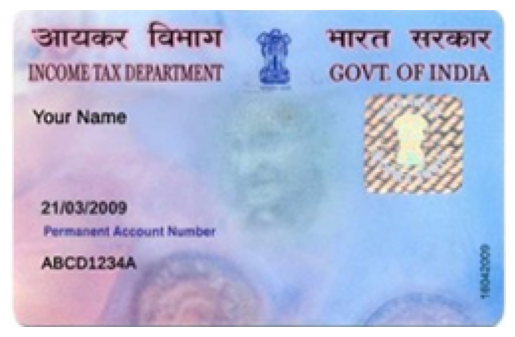

In [ ]:
# Open the tempered image
tampered = Image.open("/content/pan_card_tempring/static/images/tampered.jpg")
plt.imshow(tampered)
plt.axis("off")
plt.show()

In [ ]:
# Image format
print(f"Original image format : {original.format}")
print(f"Tampered image format : {tampered.format}")

# Image size

print(f"Original image size : {original.size}")
print(f"Tampered image size : {tampered.size}")


Original image format : JPEG
Tampered image format : JPEG
Original image size : (250, 160)
Tampered image size : (250, 160)


# Above both files have same size and format if differ then we have to resize the sahape and make same format but in this case we are ok with it

In [ ]:

# Read the original image using OpenCV
original_cv2 = cv2.imread('/content/pan_card_tempring/static/images/original.jpg')

# Read the tampered image using OpenCV
tampered_cv2 = cv2.imread('/content/pan_card_tempring/static/images/tampered.jpg')


In [ ]:

# Convert the images to grayscale
original_grayscale = cv2.cvtColor(original_cv2, cv2.COLOR_BGR2GRAY)
tampered_grayscale = cv2.cvtColor(tampered_cv2, cv2.COLOR_BGR2GRAY)


# I have converted the images to grayscale because cv2 better works with grayscale images because it has 1 channel whereas the colored images have 3 channels RGB

# Computing the structure similarity index score between the two images which will help us to know that how much similar both the pictures are

In [ ]:
(score, diff) = structural_similarity(original_grayscale, tampered_grayscale, full = True)
diff = (diff * 255).astype("uint8")
print (f"SSIM score is: {score}")

SSIM score is: 0.2952677730856737


In [ ]:

# Apply thresholding to the difference image
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Find contours in the thresholded image
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)



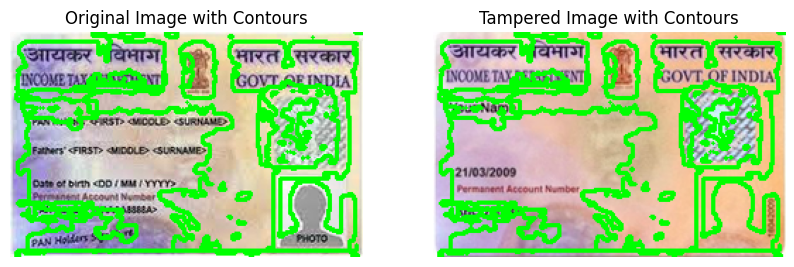

In [ ]:
# prompt: loop over the contours and make bounding rectangles on the images

# Loop over the contours
for c in contours:
  # Draw the contour on the original image
  cv2.drawContours(original_cv2, [c], -1, (0, 255, 0), 2)
  # Draw the contour on the tampered image
  cv2.drawContours(tampered_cv2, [c], -1, (0, 255, 0), 2)

# Display the images with the contours
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_cv2)
plt.title("Original Image with Contours")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(tampered_cv2)
plt.title("Tampered Image with Contours")
plt.axis("off")
plt.show()


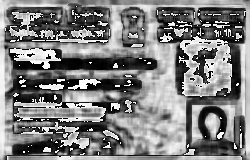

In [ ]:
# Displaying difference images with bkack because contours are not showing up clearly

Image.fromarray(diff)

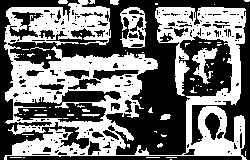

In [ ]:
# Discplay threshold image with white
Image.fromarray(thresh)